<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Modulo_03/Bootcamp_Mod3_Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg'>

# **Análise de séries temporais**

---

Esse notebook servirá para o acompanhamento das aulas do Módulo 03 do ***Bootcamp de Data Science Aplicada*** realizado pela Alura.

Neste módulo vamos descobrir o que são séries temporais e estudar suas particularidades.

Todo arcabouço teórico adquirido até aqui será aplicado para o entendimento das nuances envolvendo as séries temporais. Da estatística descritiva, passando pela análise exploratória e chegando às previsões, sempre de forma aplicada e prática utilizando ferramentas específicas para esse tipo de dados, como o **```StatsModel```** e **```Prophet```** desenvolvido pelo **Facebook**.

---

## **Aula 01 - Entendendo a Série Temporal**
---


### Aula 01 - Vídeo 01
Atividade 3 - Coleta de Dados e Primeiras Análises

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np
import statsmodels.tsa.api

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
#warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (12,6)

Para esse módulo vamos trabalhar com os dados relativos à epidemia de COVID-19 fornecidos pelo Governo do Estado de São Paulo. O material desse notebook está atualizado até o dia 17/junho/2021.

Fonte: [SEADE](https://www.seade.gov.br/coronavirus/)

In [3]:
url = 'https://github.com/gcochlar/Bootcamp_DataScience/blob/main/dados/dados_covid_sp-2021-06-17.zip?raw=true'

In [4]:
dados = pd.read_csv(url,
                    sep = ';',
                    compression = 'zip')

In [5]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


O *dataset* importado contém diversas colunas e informações de todos os municípios do Estado. O primeiro passo para podermos trabalhar com Séries Temporais e fazer o ***Python*** reconhecer que a coluna 'datahora' é composta por dados no formato **```datetime```**.

In [6]:
dados['datahora'] = pd.to_datetime(dados.datahora,
                                   format = '%Y-%m-%d')

Agora vamos plotar as informações de casos acumulados.

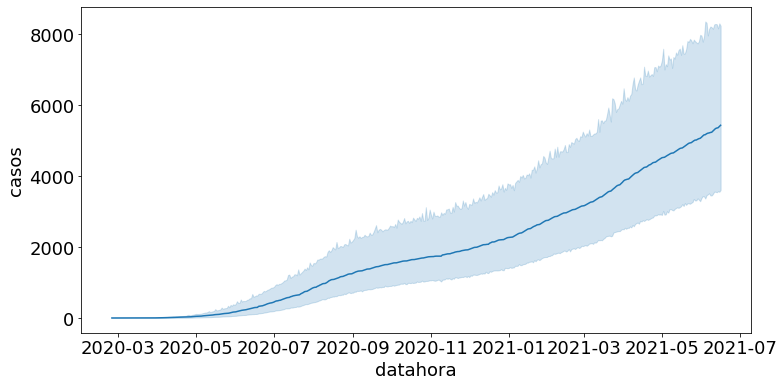

In [7]:
sns.lineplot(data = dados,
             x = 'datahora',
             y = 'casos') # intervalo de confiança (ci) default é 95%

Podemos ver na linha azul a média de casos acumulados para os diversos municípios e na área azul mais clara, os valores dos municípios (com intervalo de confiança de 95%).

Vamos plotar também a informação com um intervalo de confiança de 100%, ou seja, considerando todos os dados.

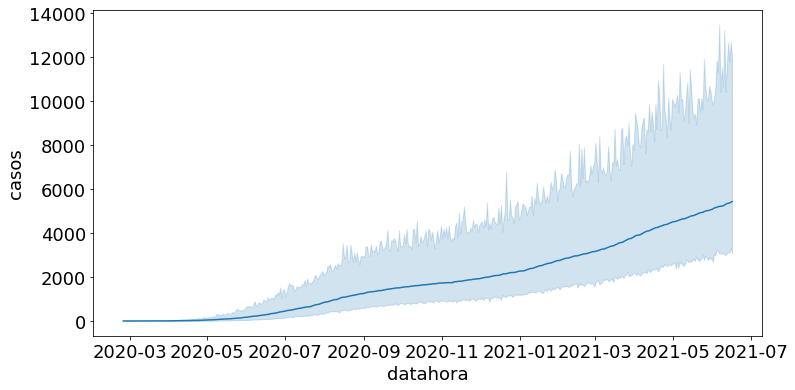

In [8]:
sns.lineplot(data = dados,
             x = 'datahora',
             y = 'casos',
             ci=100)

Podemos ver que a área azul fica deslocada em relação à média. Isso indica que temos mais municípios menores, com poucos casos, puxando a média para baixo. Isso ocorre pois não há qualquer tipo de ponderação da quantidade de casos em relação ao tamanho da população de cada município.

Mesmo assim, podemos perceber o crescimento de casos ocorrendo de uma forma não-linear.

**HIPÓTESE:** O crescimento de casos no estado de SP é exponencial.

Vamos começar traçando uma curva exponencial simples, a partir de dados gerados automaticamente.

In [9]:
eixo_x = np.linspace(-2,2,100)
y_exp = np.exp(eixo_x)

A partir dos dados de **x** e **y** gerados acima, vamos plotar uma curva exponencial.

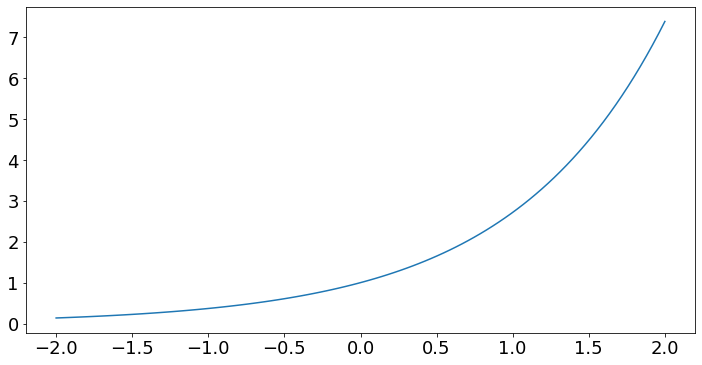

In [10]:
sns.lineplot(x = eixo_x,
             y = y_exp)

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$


Se aplicarmos o logaritmo na escala do eixo **y**, veremos que a curva exponencial, para os mesmos dados, se torna uma reta.

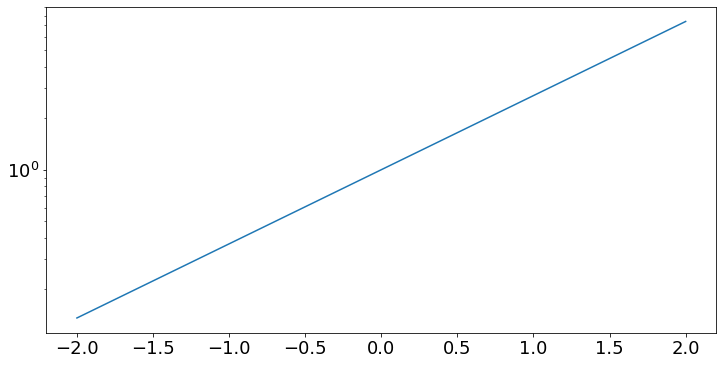

In [11]:
sns.lineplot(x = eixo_x,
             y = y_exp)
mpl.pyplot.yscale('log')

Sendo assim, uma forma de verificar se uma série de dados apresenta crescimento exponencial é usar uma escala logarítmica. Se a curva se aproximar de uma reta é porque temos um crescimento exponencial.

Vamos analisar o comportamento da cidade de São Paulo em relação a isso.

In [12]:
dados_spc = dados.query('nome_munic == "São Paulo"')
dados_spc.shape

(478, 26)

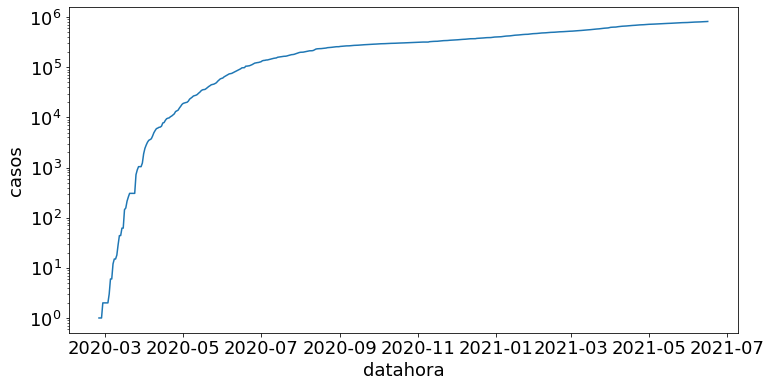

In [13]:
sns.lineplot(x = 'datahora',
             y = 'casos',
             data = dados_spc)
mpl.pyplot.yscale('log')

Apesar de não termos uma reta única, podemos ver pelo menos 3 segmentos de retas, com inclinações diferentes.

A **hipótese** se confirma, o crescimento foi exponencial, apesar de ter ocorrido em 3 momentos diferentes, mudando a taxa de crescimento em cada ponto que altera a inclinação da reta.


<img src='https://drive.google.com/uc?id=1YgdKDm4xdkUkNl40Wx3JyJcEoIaWj8Hv'>

#### **Desafio - Filtrar a base para pegar o município de São Paulo sem usar a função ```query```**
---

Temos as alternativas abaixo para gerar o mesmo recorte no *dataset*.

In [14]:
df_sp = dados[(dados['nome_munic'] == 'São Paulo')]
df_sp.shape

(478, 26)

In [15]:
df_sp2 = dados.loc[(dados['nome_munic'] == 'São Paulo')]
df_sp2.shape

(478, 26)

#### **Desafio - Escolher outro município (do estado de SP ou não) para fazer a análise**
---


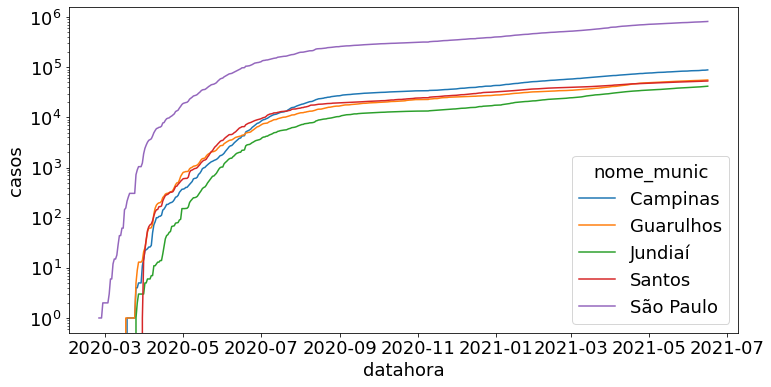

In [16]:
lista_cidades = ['São Paulo','Santos','Campinas','Jundiaí','Guarulhos']

dados_desafio = dados[(dados['nome_munic'].isin(lista_cidades))]
sns.lineplot(x = 'datahora',
             y = 'casos',
             hue='nome_munic',
             data = dados_desafio)
mpl.pyplot.yscale('log')

Para fazer a análise do desafio, criei uma variável contendo a lista de cidades a ser plotada e escolhi algumas das maiores cidades do estado para fazer uma comparação sem perder muito da visualização em função da escala.

Apesar de estarmos lidando com grandezas diferentes, principalmente ao compararmos a cidade de São Paulo com as demais, podemos verificar que a curva de crescimento com 3 estágios ou diferentes inclinações é muito semelhante em todas elas.

A fase inicial, mais aguda, com rápida disseminação, durando 45 a 60 dias. Depois tivemos medidas de restrição da circulação das pessoas, reduzindo a velocidade de contágio, com 90 a 120 dias. Por último, a fase de crescimento com menor inclinação, que dura até hoje.

### Aula 01 - Vídeo 02
Atividade 4 - Taxa de Crescimento e Média Móvel

Até agora estávamos trabalhando com a variável 'casos', que nos apresentava os casos acumulados. Vamos passar a analisar agora os casos novos diários, através da coluna 'casos_novos'.

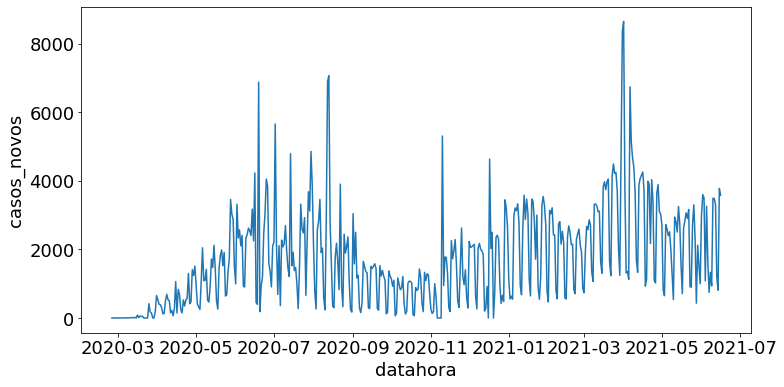

In [17]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_spc)

Esse gráfico é mais "nervoso", a série de dados apresentada é mais caótica, com variações muito abruptas no dia a dia.

Para suavizar essas variações e nos possibilitar uma melhor análise, devemos fazer a **diferenciação** dos dados.

Vamos demonstrar o processo com um *DataFrame* de exemplo.

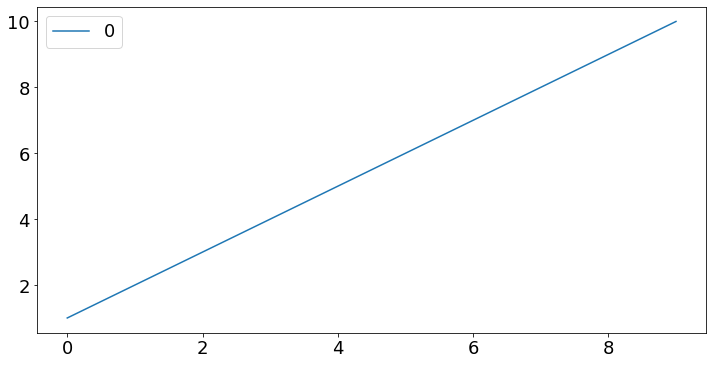

In [18]:
dados_exemplo = pd.DataFrame(
    data = np.linspace(1,10,10))

sns.lineplot(data = dados_exemplo)

In [19]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

dados_exemplo

,0,diferenciado
0,1.0,NaN
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0
5,6.0,1.0
6,7.0,1.0
7,8.0,1.0
8,9.0,1.0
9,10.0,1.0


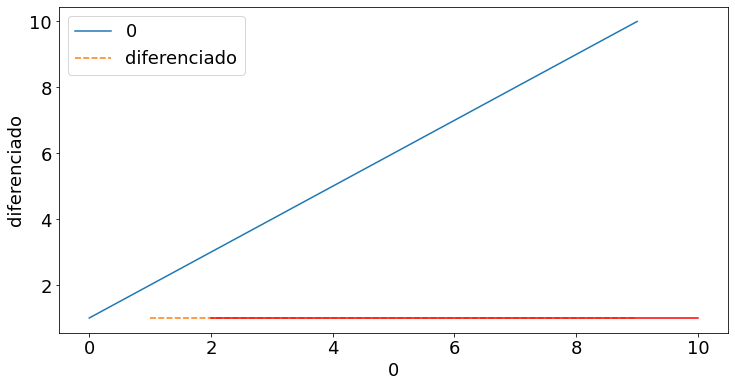

In [20]:
sns.lineplot(data = dados_exemplo)
sns.lineplot(data = dados_exemplo, x = 0, y = 'diferenciado', color = 'red')

Podemos observar que a linha vermelha, com os dados diferenciados, se torna uma reta horizontal. A **diferenciação** nada mais é do que a substituição do valor absoluto pela diferença entre o próprio e o seu valor anterior, ou seja, a taxa de crescimento dos dados.

Como a nossa reta (em azul) foi montada com os valores de 1 a 10 variando de 1 em 1, o valor da diferenciação (a partir do segundo ponto do gráfico) é sempre 1.

Vamos agora criar colunas em nossa base de dados com a taxa de crescimento de casos novos e de óbitos.

In [21]:
dados_spc['taxa_crescimento_casos'] = dados_spc['casos_novos'].diff()
dados_spc['taxa_crescimento_obitos'] = dados_spc['obitos_novos'].diff()

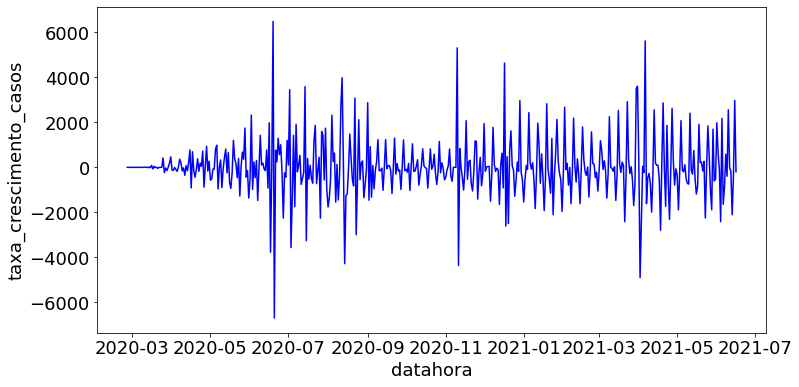

In [22]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_casos',
             data = dados_spc,
             color = 'blue')


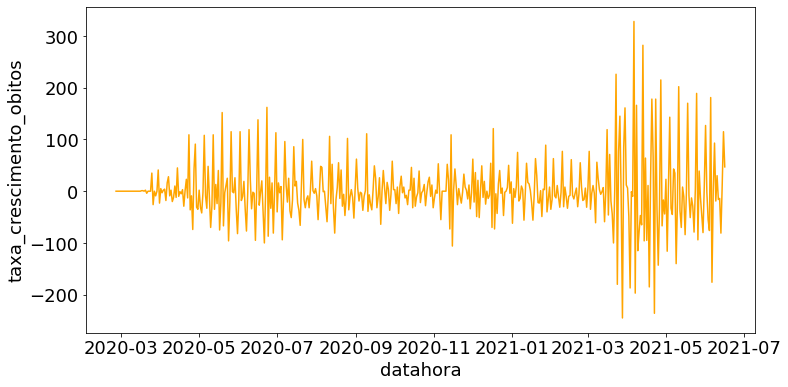

In [23]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_spc,
             color = 'orange')

Podemos ver que os gráficos continuam "nervosos", com muitas oscilações no dia a dia e apresentando diversos picos.

#### **Desafio - Deixar o Notebook sem os** ***warnings***
---

Estou deixando os códigos comentados, por enquanto, para não ficar sem os *warnings*, mas a solução está abaixo.

In [24]:
#import warnings
#warnings.filterwarnings('ignore')

#### **Desafio - Verificar se o Pico da Taxa de Casos Novos Coincide com a Taxa de Óbitos Novos**
---


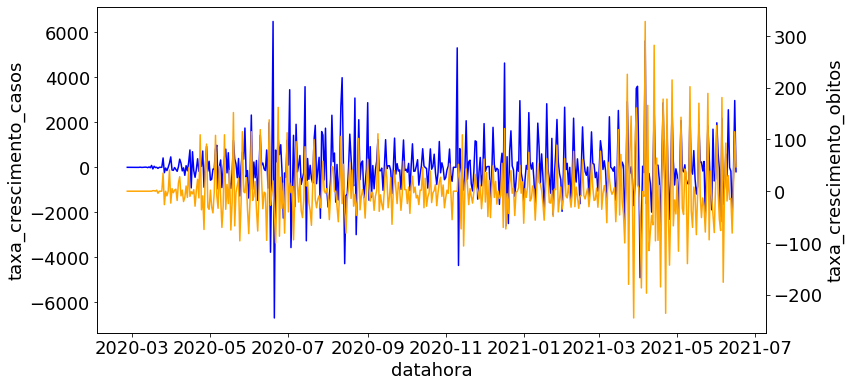

In [25]:
sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_casos',
             data = dados_spc,
             color = 'blue')

plt.twinx()

sns.lineplot(x = 'datahora',
             y = 'taxa_crescimento_obitos',
             data = dados_spc,
             color = 'orange')

Optei por trabalhar com um eixo **y** secundário para ficar mais fácil de visualizar as variações, já que usando um eixo único a escala praticamente impossibilita a visualização dos óbitos.

O pico de casos novos, em azul, ocorrido do final de junho/2020 não parece ter tido um impacto muito grande na taxa de óbitos (em laranja), bem como no pico do final de 2020.

Já o pico de abril a maio de 2021 parece ter tido mais impacto, deixando a taxa de óbitos com maior oscilação.

#### De volta para a aula...
---

Vamos colocar em um gráfico de barras para visualizar.

<BarContainer object of 478 artists>

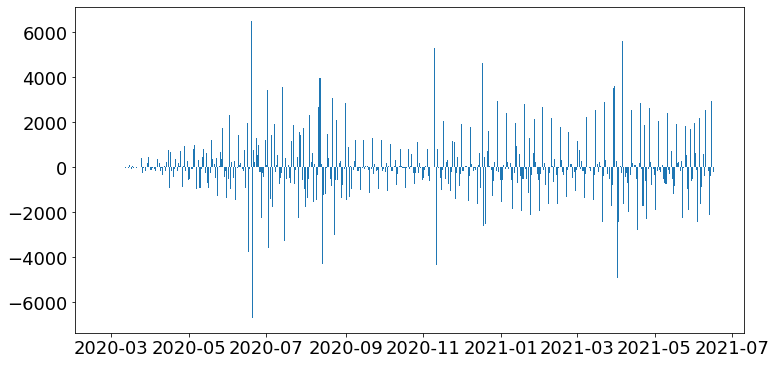

In [26]:
plt.bar(dados_spc['datahora'],dados_spc['taxa_crescimento_casos'])


A série de dados é muito extensa para ser analisada desta forma. Vamos aproveitar que temos uma coluna com dados em formato **```datetime```** e separar os dados de 2021 para analisar separadamente.

In [27]:
dados_spc['Ano'] = pd.DatetimeIndex(dados_spc['datahora']).year

In [28]:
dados_spc_2021 = dados_spc.query('Ano == 2021')

<BarContainer object of 167 artists>

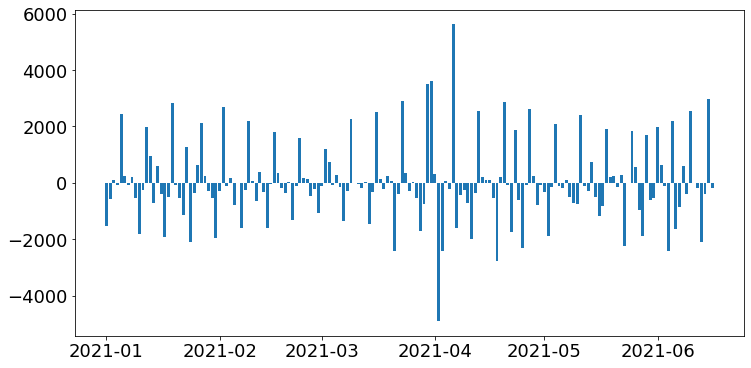

In [29]:
plt.bar(dados_spc_2021['datahora'],dados_spc_2021['taxa_crescimento_casos'])

<BarContainer object of 167 artists>

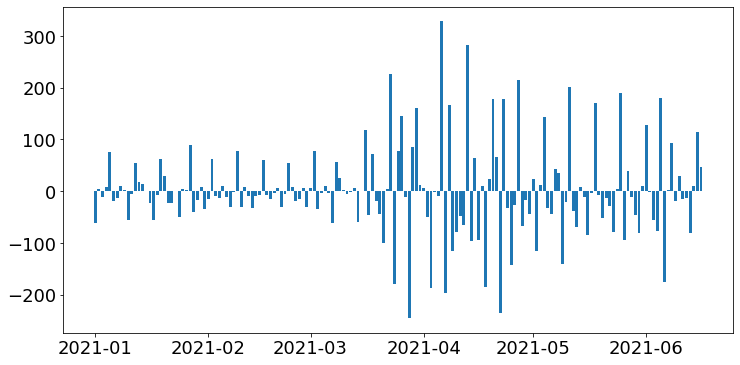

In [30]:
plt.bar(dados_spc_2021['datahora'],dados_spc_2021['taxa_crescimento_obitos'])

Tanto no caso dos casos novos quanto no caso dos óbitos podemos ver que os picos normalmente são antecedidos por dias com baixas quantidades de casos e óbitos.

Isso pode indicar algum tipo de represamento das informações que estão sendo fornecidas pelos municípios.

#### **Desafio - Deixar os gráficos mais bonitos**
---

Ajustar inclinação das *labels* do eixo **x**, colocar títulos, nomes dos eixos.

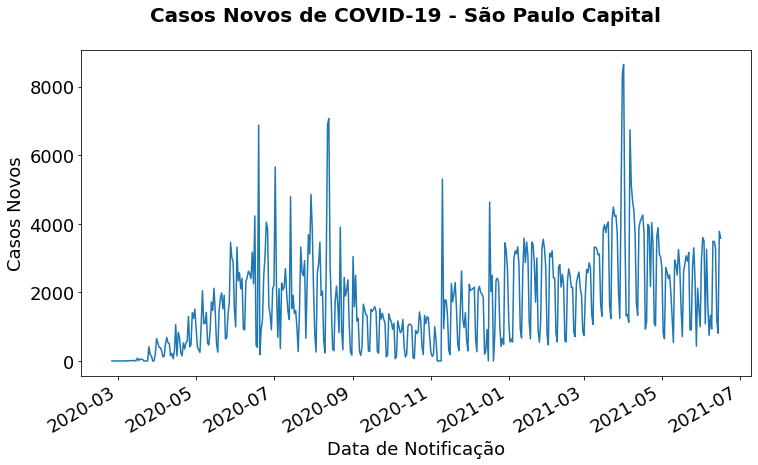

In [31]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_spc)

plt.suptitle('Casos Novos de COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data de Notificação')
plt.ylabel('Casos Novos')
plt.xticks(rotation=30,ha='right')
plt.show()

#### De volta para a aula...
---

Esses gráficos fazem parte do processo de análise mas normalmente não são mostrados para pessoas leigas.

Para mostrar o que está acontecendo, normalmente queremos passar uma ideia de tendências.

Vamos trabalhar com médias móveis, usando as informações dos casos novos somente para a cidade de São Paulo. Inicialmente vamos trabalhar com os dados de uma semana, ou seja, a média móvel de 7 dias.

In [32]:
dados_spc['Média Móvel Casos Novos'] = dados_spc['casos_novos'].rolling(window = 7, ## trata a janela de observação como sendo de 7 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
dados_spc['Média Móvel Óbitos Novos'] = dados_spc['obitos_novos'].rolling(window = 7, ## trata a janela de observação como sendo de 7 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana


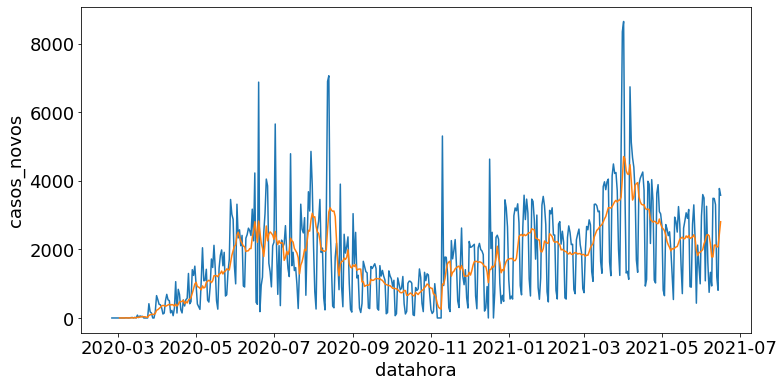

In [33]:
sns.lineplot(x = 'datahora',
             y = 'casos_novos',
             data = dados_spc)
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Casos Novos',
             data = dados_spc)

Visualizando no mesmo gráfico os casos novos e a média móvel de 7 dias podemos perceber que o uso da média suaviza a curva, reduzindo a quantidade de picos nas informações.

#### **Desafio - Gerar o Gráfico da Média Móvel de Óbitos e Mudar o Gráfico de Casos para Barras**
---

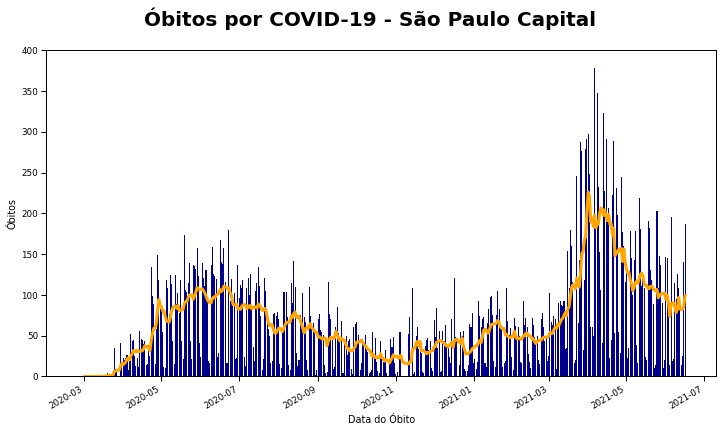

In [34]:
sns.set_context('paper')
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Óbitos Novos',
             data = dados_spc,
             color = 'orange',
             linewidth = 3)
plt.bar(x = dados_spc['datahora'],
        height = dados_spc['obitos_novos'],
        color = 'darkblue')

plt.ylim(0,400)
plt.suptitle('Óbitos por COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data do Óbito')
plt.ylabel('Óbitos')
plt.xticks(rotation=30,ha='right')
plt.show()

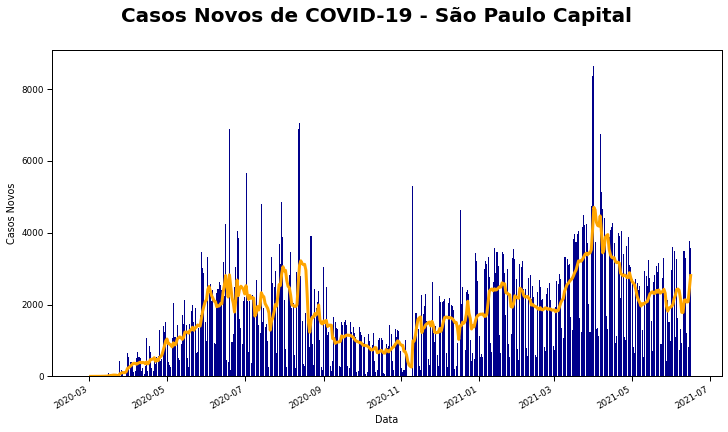

In [35]:
sns.set_context('paper')
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Casos Novos',
             data = dados_spc,
             color = 'orange',
             linewidth = 3)
plt.bar(x = dados_spc['datahora'],
        height = dados_spc['casos_novos'],
        color = 'darkblue')

#plt.ylim(0,400)
plt.suptitle('Casos Novos de COVID-19 - São Paulo Capital',
             fontsize=20,fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Casos Novos')
plt.xticks(rotation=30,ha='right')
plt.show()

#### **Desafio Extra - Gerar Gráficos de Casos Novos e Óbitos com a Média Móvel de 14 Períodos**
---

Resolvi gerar essas visualizações adicionais a título de curiosidade, para ver o quanto mais ficariam suavizadas as curvas dobrando a janela de média móvel para 14 dias.

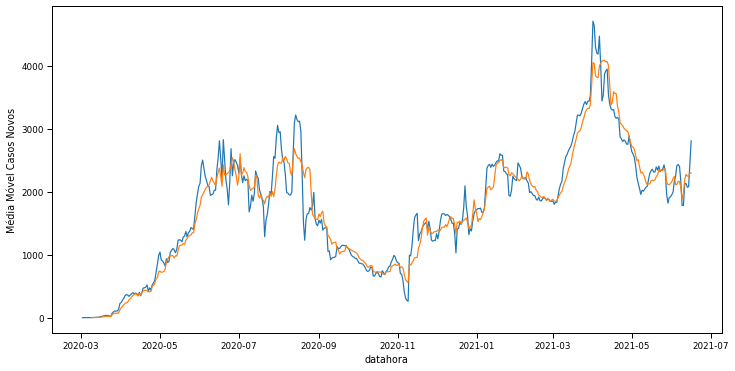

In [36]:
dados_spc['MM14 Casos Novos'] = dados_spc['casos_novos'].rolling(window = 14, ## trata a janela de observação como sendo de 14 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Casos Novos',
             data = dados_spc)
sns.lineplot(x = 'datahora',
             y = 'MM14 Casos Novos',
             data = dados_spc)

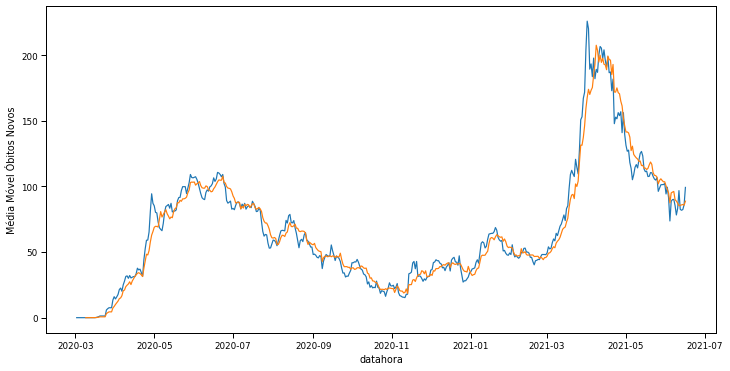

In [37]:
dados_spc['MM14 Óbitos Novos'] = dados_spc['obitos_novos'].rolling(window = 14, ## trata a janela de observação como sendo de 14 dias
                                                                       center = False).mean() ## joga o ponto para o final da semana
sns.lineplot(x = 'datahora',
             y = 'Média Móvel Óbitos Novos',
             data = dados_spc)
sns.lineplot(x = 'datahora',
             y = 'MM14 Óbitos Novos',
             data = dados_spc)

Como podemos ver, as linhas em laranja representando a média móvel de 14 períodos ficaram ainda mais suaves.

### Aula 01 - Vídeo 03
Atividade 5 - Correlação e Função de Autocorrelação

Para identificar sazonalidades, precisamos identificar a correlação entre períodos diferentes da nossa série temporal.

Vamos começar plotando a correlação mais óbvia, que seria da série com ela mesma.

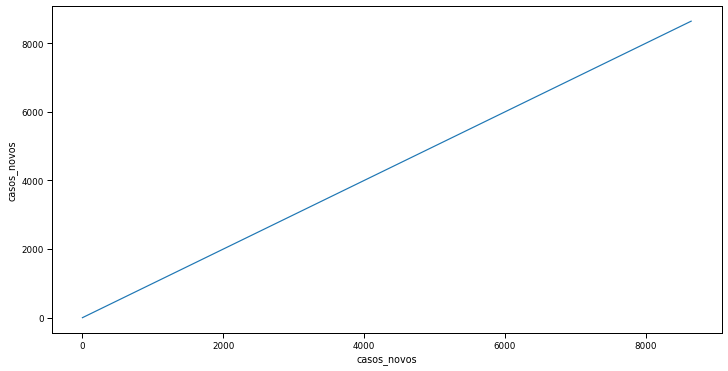

In [38]:
sns.lineplot(x = 'casos_novos',
             y = 'casos_novos',
             data = dados_spc)

Temos uma linha reta, na diagonal do gráfico, pois essa correlação dos dados com eles mesmos é forte, positiva e direta, ou seja, é igual a 1.

Vamos verificar se o número de casos novos é correlacionado ao número de óbitos.

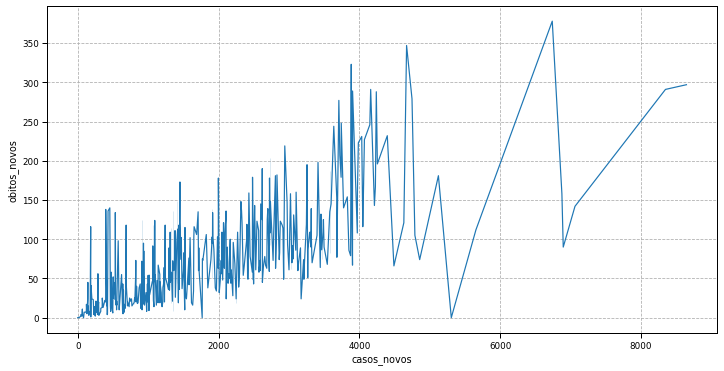

In [39]:
sns.lineplot(x = 'casos_novos',
             y = 'obitos_novos',
             data = dados_spc)

plt.grid(linestyle = '--')

plt.show()

Apesar de termos um início da série plotando o que seria uma tendência de linha diagonal, mais à direita do gráfico as linhas ficam mais erráticas e mostram não haver correlação entre as informações.

In [40]:
teste = sns.axes_style()
teste

{'axes.axisbelow': 'line',
 'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': (1, 1, 1, 0),
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'image.cmap': 'viridis',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}

#### **Desafio - Mover o Número de Óbitos e Verificar se Altera a Correlação**
---

>Deslocando os dados de óbitos 14 dias para frente e 14 dias para trás em relação aos dados de casos novos, verificar se isso altera a correlação, deixando o gráfico mais parecendo uma reta.

---

Eu acho que deslocar os óbitos para frente não faz sentido, vale mais a pena testar mais janelas de dias para trás. Com isso vamos comparar os óbitos do dia **Z** com os casos do dia **Z - 14**, que é a relação mais provável, pois o paciente vai adoecer e, depois de um tempo, ou vai se curar ou vai falecer.

Pesquisando na internet, encontrei links que indicam o tempo médio entre os primeiros sintomas e o óbito variando entre 14 e 28 dias (links [aqui](https://www.cnnbrasil.com.br/saude/2021/03/24/tempo-medio-ate-morte-por-covid-19-em-utis-de-sp-caiu-4-dias-no-ultimo-trimestre) e [aqui](https://diariodonordeste.verdesmares.com.br/metro/tempo-medio-entre-inicio-de-sintomas-e-morte-por-covid-no-ceara-e-10-dias-maior-na-segunda-onda-1.3097493)).

Por isso vou gerar as colunas com os dados de óbitos antecipados em 14, 21 e 28 dias e verificar se existe uma correlação maior de alguma dessas séries com a quantidade de casos novos.

In [41]:
dados_spc['Óbitos -14'] = dados_spc['obitos_novos'].shift(-14)
dados_spc['Óbitos -21'] = dados_spc['obitos_novos'].shift(-21)
dados_spc['Óbitos -28'] = dados_spc['obitos_novos'].shift(-28)

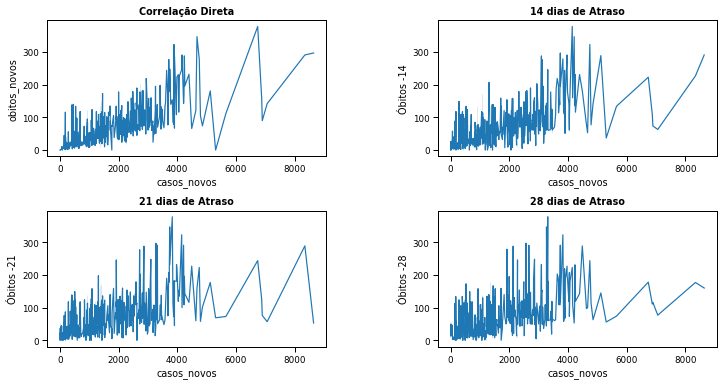

In [42]:
fig, ax = plt.subplots(nrows = 2,ncols=2)#,
                       #sharex = True, sharey = True)

ax[0,0] = sns.lineplot(x = 'casos_novos',
                       y = 'obitos_novos',
                       data = dados_spc,
                       ax = ax[0,0])
ax[0,0].set_title('Correlação Direta',fontweight='bold')

ax[0,1] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -14',
                       data = dados_spc,
                       ax = ax[0,1])
ax[0,1].set_title('14 dias de Atraso',fontweight='bold')

ax[1,0] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -21',
                       data = dados_spc,
                       ax = ax[1,0])
ax[1,0].set_title('21 dias de Atraso',fontweight='bold')

ax[1,1] = sns.lineplot(x = 'casos_novos',
                       y = 'Óbitos -28',
                       data = dados_spc,
                       ax = ax[1,1])
ax[1,1].set_title('28 dias de Atraso',fontweight='bold')

plt.subplots_adjust(wspace=0.4, 
                    hspace=0.4)

In [43]:
i_maior_correl = 0
maior_correl = 0
i_menor_correl = 0
menor_correl = 0

for i in list(range(0,int(dados_spc.shape[0]/2),1)):
    df_temp = pd.DataFrame()
    df_temp['casos'] = dados_spc['casos_novos']
    df_temp['obitos_desloc'] = dados_spc['obitos_novos'].shift(-i)
    df_temp.dropna(inplace=True)
    correl = np.corrcoef(df_temp['casos'],df_temp['obitos_desloc'])
    if correl[0,1] > maior_correl:
        maior_correl = correl[0,1]
        i_maior_correl = i
    elif correl[0,1] < menor_correl:
        menor_correl = correl[0,1]
        i_menor_correl = i

print('Maior -->',i_maior_correl,' - ',maior_correl)
print('Menor -->',i_menor_correl,' - ',menor_correl)


Maior --> 0  -  0.7355456733962457
Menor --> 171  -  -0.2228306004435471


Não percebi diferenças significativas entre os gráficos, por isso resolvi rodar o código acima, analisando qual a maior e qual a menor correlação entre os casos novos e os óbitos deslocados.

A maior correlação seria uma relação direta, mais próxima de 1, enquanto a menor correlação, quanto mais próxima de -1 indicaria uma correlação inversa.

Rodei as iterações até metade da base, pois a partir daí a quantidade de dados começa a ficar menor e pode gerar falsos resultados.

O resultado obtido foi de que a maior correlação direta é mesmo dos dados originais, sem deslocamento algum. E a correlação inversa é muito fraca, sendo o resultado mais significativo obtido com o deslocamento de 171 dias.

#### De volta para a aula...
---

Em busca de identificar sazonalidades, vamos separar os dados dos meses iniciais do ano de 2021.

In [44]:
dados_spc['Mês'] = pd.DatetimeIndex(dados_spc['datahora']).month
dados_spc_202101 = dados_spc.query('Mês == 1 & Ano == 2021')
dados_spc_202102 = dados_spc.query('Mês == 2 & Ano == 2021')

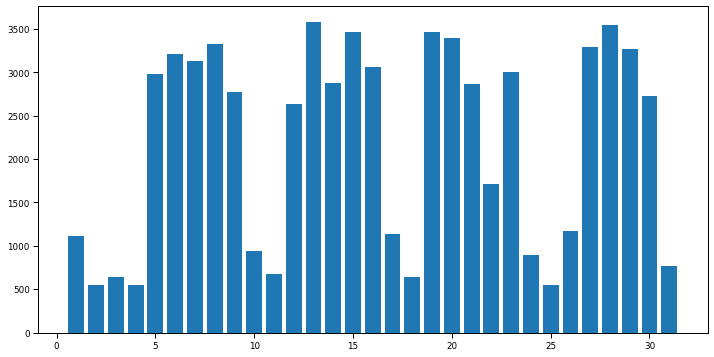

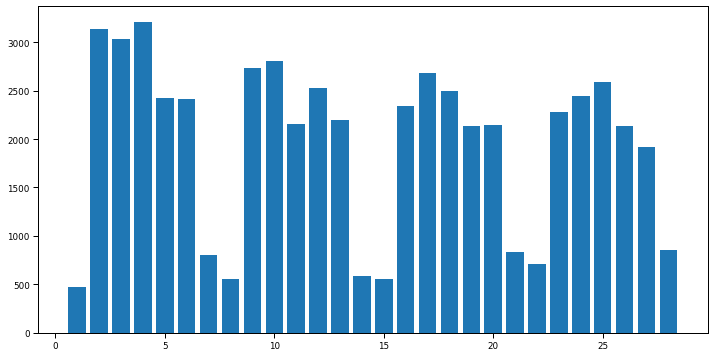

In [45]:
plt.bar(np.linspace(1,31,31),dados_spc_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28),dados_spc_202102['casos_novos'])
plt.show()

Podemos perceber um "padrão" de comportamento se repetindo semanalmente, tendo 5 dias (de 2ª à 6ª-feira) com elevado número de casos novos e 2 dias (final de semana) de baixa notificação. Isso é um tipo de sazonalidade.

Também podemos perceber que as baixas notificações também ocorrem em feriados.

Uma forma de identificar sazonalidades é através da autocorrelação, ou seja, a correlação da série de dados com ela mesma, deslocada de **X** períodos (ou ***lags***).

Vamos verificar isso em relação aos casos novos na cidade de São Paulo.

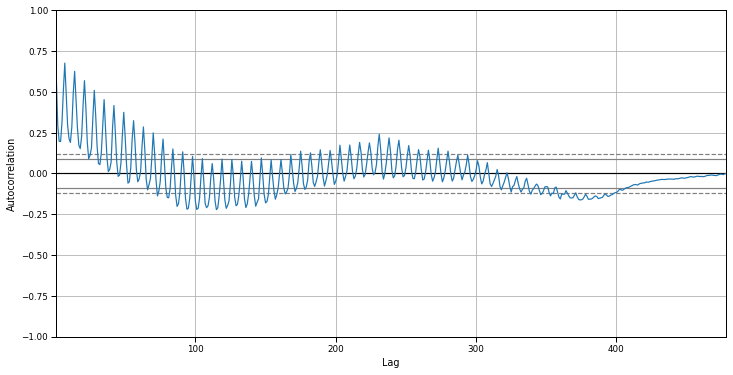

In [46]:
autocorrelation_plot(dados_spc['casos_novos'])

In [47]:
i_maior_correl = 0
maior_correl = 0
i_menor_correl = 0
menor_correl = 0

for i in list(range(1,int(dados_spc.shape[0]/2),1)):
    df_temp = pd.DataFrame()
    df_temp['casos'] = dados_spc['casos_novos']
    df_temp['casos_desloc'] = dados_spc['casos_novos'].shift(-i)
    df_temp.dropna(inplace=True)
    correl = np.corrcoef(df_temp['casos'],df_temp['casos_desloc'])
    if correl[0,1] > maior_correl:
        maior_correl = correl[0,1]
        i_maior_correl = i
    elif correl[0,1] < menor_correl:
        menor_correl = correl[0,1]
        i_menor_correl = i

print('Maior -->',i_maior_correl,' - ',maior_correl)
print('Menor -->',i_menor_correl,' - ',menor_correl)


Maior --> 7  -  0.6906857053369071
Menor --> 115  -  -0.28244365950838607


Também rodei o código que faz as iterações para identificar qual seria o ponto de maior e menor correlação. Para os casos novos, a maior correlação seria com um deslocamento de 7 dias e o menor valor seria com o deslocamento de 115 dias.

Aqui tive uma dificuldade, pois apesar do cálculo ter apontado -0.28, o gráfico em nenhum momento baixou de -0.25...

Vamos plotar, a título de exemplo, o que seria uma correlação para um conjunto aleatório de dados.

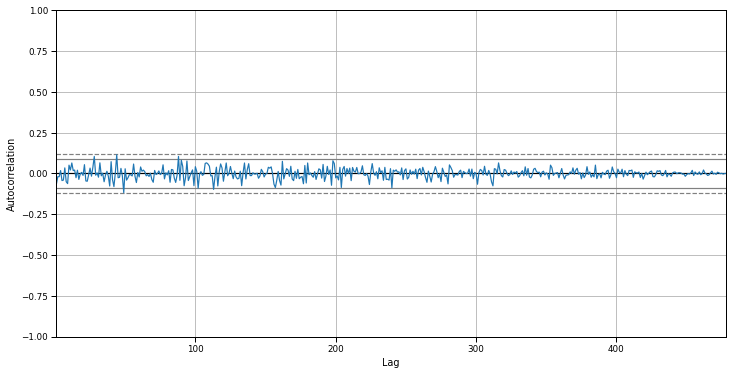

In [48]:
autocorrelation_plot(np.random.rand(dados_spc.shape[0]))

Vamos verificar também como se comporta a autocorrelação no número de óbitos.

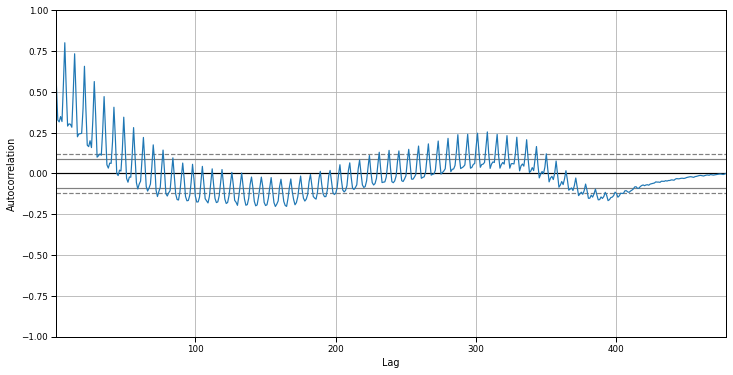

In [49]:
autocorrelation_plot(dados_spc['obitos_novos'])

In [50]:
i_maior_correl = 0
maior_correl = 0
i_menor_correl = 0
menor_correl = 0

for i in list(range(1,int(dados_spc.shape[0]/2),1)):
    df_temp = pd.DataFrame()
    df_temp['obitos'] = dados_spc['obitos_novos']
    df_temp['obitos_desloc'] = dados_spc['obitos_novos'].shift(-i)
    df_temp.dropna(inplace=True)
    correl = np.corrcoef(df_temp['obitos'],df_temp['obitos_desloc'])
    if correl[0,1] > maior_correl:
        maior_correl = correl[0,1]
        i_maior_correl = i
    elif correl[0,1] < menor_correl:
        menor_correl = correl[0,1]
        i_menor_correl = i

print('Maior -->',i_maior_correl,' - ',maior_correl)
print('Menor -->',i_menor_correl,' - ',menor_correl)


Maior --> 7  -  0.8143461393739687
Menor --> 165  -  -0.3903601997731131


Rodei novamente o código com as iterações e novamente tive dificuldade para entender o valor mínimo, que calculado é com deslocamento de 165 dias e é -0.39, enquanto no gráfico não tivemos nenhum ponto abaixo de -0.25...

#### **Desafio - Calcular a Correlação Cruzada dos Óbitos e Casos Novos**
---
>Usar a biblioteca **```StatsModels```**

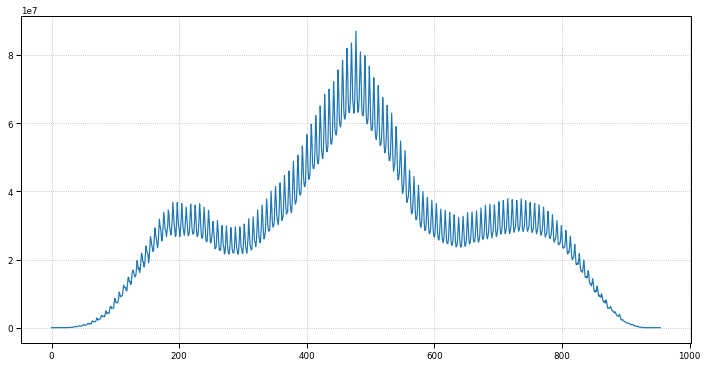

In [51]:
plt.plot(np.correlate(dados_spc['casos_novos'],
                      dados_spc['obitos_novos'],
                      mode = 'full'))
plt.grid(linestyle = 'dotted')

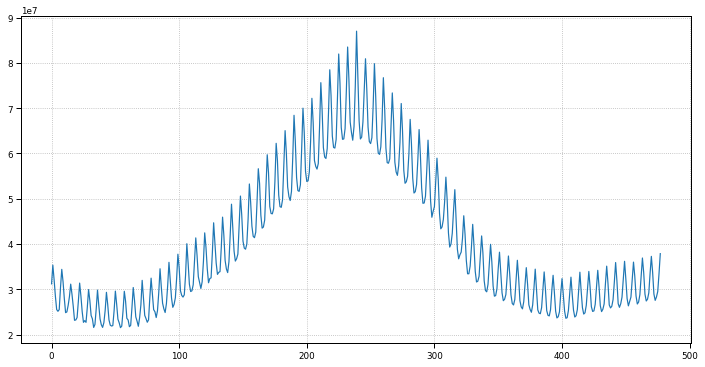

In [52]:
plt.plot(np.correlate(dados_spc['casos_novos'],
                      dados_spc['obitos_novos'],
                      mode = 'same'))
plt.grid(linestyle = 'dotted')

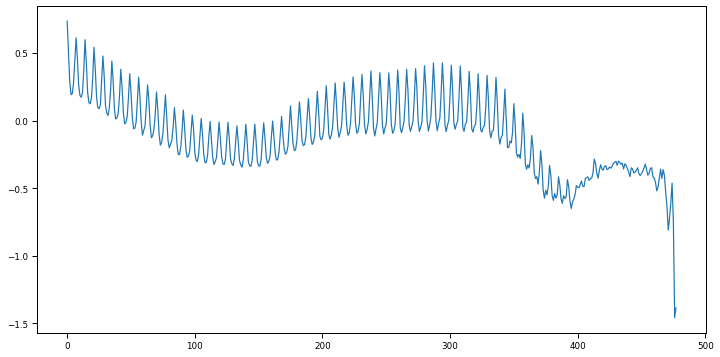

In [53]:
plt.plot(statsmodels.tsa.stattools.ccf(dados_spc['casos_novos'],
                                       dados_spc['obitos_novos'],
                                       True))
plt.show()

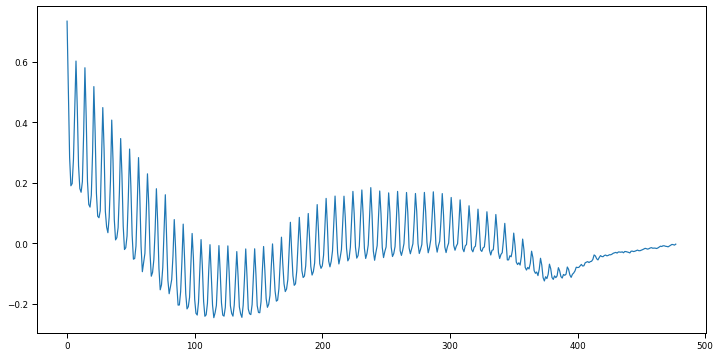

In [54]:
plt.plot(statsmodels.tsa.stattools.ccf(dados_spc['casos_novos'],
                                       dados_spc['obitos_novos'],
                                       False))
plt.show()

#### **Desafio - Escolher Outro Município e Refazer as Análises**
---


### **O que aprendemos nessa aula?**
---

>* Aprendemos o que é uma série temporal;
* Calculamos a taxa de crescimento de um evento em uma série temporal;
* Aprendemos o que é uma média móvel;
* Entendemos o que é correlação e função de autocorrelação.

---
* Preciso entender melhor a questão do funcionamento do **```autocorrelation_plot```**, principalmente o real significado dos *lags*.

Eu entendi que são os diferentes deslocamentos da série de dados que são feitos para verificar a correlação, mas é melhor confirmar. Achei o resultado muito rápido para ser isso, que é bem mais complexo.